In [7]:
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

import numpy as np

In [2]:
basic_movie_info = pd.read_parquet('basic_features.parquet')

In [3]:
basic_movie_info.columns

Index(['budget', 'id', 'imdb_id', 'popularity', 'revenue', 'title',
       'release_date', 'cast_popularity', 'crew_popularity', 'star_present'],
      dtype='object')

Training a basic model

In [15]:
encoded_df = pd.get_dummies(basic_movie_info, columns=['star_present'])
encoded_df.head()

,budget,id,imdb_id,popularity,revenue,title,release_date,cast_popularity,crew_popularity,star_present_No,star_present_Yes
0,10400000,360814,tt5074352,22.057,311000000,Dangal,2016-12-21,68.289,72.850,False,True
1,6087315,132316,tt2176013,9.961,256884693,Jab Tak Hai Jaan,2012-11-13,76.745,35.234,False,True
2,7700000,61202,tt1562872,22.366,160000000,Zindagi Na Milegi Dobara,2011-07-15,77.934,91.112,False,True
3,13000000,348892,tt3863552,16.974,150000000,Bajrangi Bhaijaan,2015-07-17,72.644,114.852,False,True
4,286284,441889,tt6108090,12.123,137416709,Secret Superstar,2017-10-19,33.289,35.091,False,True


In [16]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   budget            322 non-null    int64  
 1   id                322 non-null    int64  
 2   imdb_id           318 non-null    object 
 3   popularity        322 non-null    float64
 4   revenue           322 non-null    int64  
 5   title             322 non-null    object 
 6   release_date      322 non-null    object 
 7   cast_popularity   322 non-null    float64
 8   crew_popularity   322 non-null    float64
 9   star_present_No   322 non-null    bool   
 10  star_present_Yes  322 non-null    bool   
dtypes: bool(2), float64(3), int64(3), object(3)
memory usage: 23.4+ KB


In [17]:
features = ['budget', 'popularity','cast_popularity', 'crew_popularity', 'star_present_No','star_present_Yes']
label = ['revenue']

In [22]:
movies_df = encoded_df.dropna()
scaling_factor = 1000000
X = movies_df[features]
X['budget'] = X['budget']/scaling_factor

y = movies_df[label]/scaling_factor

/tmp/ipykernel_36743/4094311529.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['budget'] = X['budget']/scaling_factor


In [25]:
model = KNeighborsRegressor(n_neighbors= 10)
# model = RadiusNeighborsRegressor(radius= 10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
reg = model.fit(X_train, y_train)

# Evaluate on training set
y_pred = reg.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print("Training set scores: mse %f, mae %f, r2 %f" % (mse, mae, r2))

# Evaluate on test set
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Test set scores: mse %f, mae %f, r2 %f" % (mse, mae, r2))

Training set scores: mse 516.009104, mae 12.141977, r2 0.312972
Test set scores: mse 2059.534965, mae 17.285969, r2 0.106022


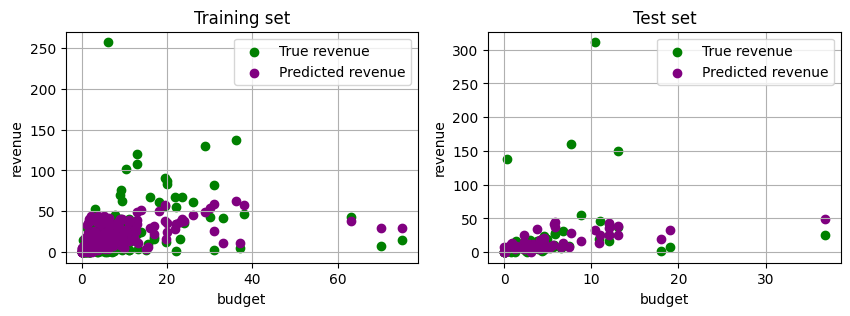

In [26]:
f, ax = plt.subplots(1, 2,figsize=(10, 3))
ax[0].scatter(X_train[['budget']], y_train, color='green')
ax[0].scatter(X_train[['budget']], reg.predict(X_train), color='purple')
ax[0].set_title('Training set')
ax[0].set_xlabel('budget')
ax[0].set_ylabel('revenue')
ax[0].legend(['True revenue', 'Predicted revenue'])
ax[0].grid()
ax[1].scatter(X_test[['budget']], y_test, color='green')
ax[1].scatter(X_test[['budget']], reg.predict(X_test), color='purple')
ax[1].set_title('Test set')
ax[1].set_xlabel('budget')
ax[1].set_ylabel('revenue')
ax[1].legend(['True revenue', 'Predicted revenue'])
ax[1].grid()

plt.show()
